In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
root = r'D:\Users\Arkady\Verint\Coursera_2019_Tensorflow_Specialization\Course3_NLP'

In [3]:
tokenizer = Tokenizer()
#!wget --no-check-certificate \
#    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
#    -O /tmp/sonnets.txt
data = open(root + '/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [4]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences = True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [5]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Train on 15462 samples
Epoch 1/100
15462/15462 [==============================] - 45s 3ms/sample - loss: 6.9110 - accuracy: 0.0243
Epoch 2/100
15462/15462 [==============================] - 39s 3ms/sample - loss: 6.4815 - accuracy: 0.0281
Epoch 3/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 6.3273 - accuracy: 0.0310
Epoch 4/100
15462/15462 [==============================] - 39s 3ms/sample - loss: 6.1916 - accuracy: 0.0379
Epoch 5/100
15462/15462 [==============================] - 40s 3ms/sample - loss: 6.0779 - accuracy: 0.0430
Epoch 6/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 5.9810 - accuracy: 0.0478
Epoch 7/100
15462/15462 [==============================] - 40s 3ms/sample - loss: 5.8806 - accuracy: 0.0475
Epoch 8/100
15462/15462 [==============================] - 39s 3ms/sample - loss: 5.7892 - accuracy: 0.0532
Epoch 9/100
15462/15462 [==============================] - 38s 2ms/sample - loss: 5.6989 - accuracy: 0.0570
Epoch

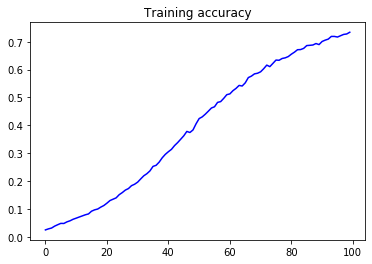

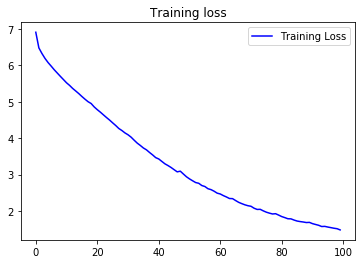

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [8]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope the world or her place that did mayst behold thy face away loving day bear state or another head age arising stay with morrow lack took still ill spent spent decay night ' still seem men form decay decay decay rare burn night ill bars to thee quite commend bow from groan grow cause of thee live thy world did proceed decay'd now razed gone set words still stay write thee to thee physic alone lies transferr'd despised ill smell leaves truth confounds receives night of pride lies express'd flatter'd dote gone so up in thee more ' be took
